AUTHOR  - MBANEFO BENEDICT CHIBUIKE

#TASK - Clean the "fake_clinic_data_extract_test" dataset

In [1]:
# import library
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the raw data 
df = pd.read_csv(r"C:\Users\mabne\Downloads\fake_clinic_data_extract_test.csv")
df.head(10)

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,2021-12-30,clinic_2,70172,1030,30,98.13
1,2021-12-29,clinic_1,53371,756,15,65.13
2,2021-12-29,clinic_2,69545,1030,30,105.18
3,2021-12-27,clinic_1,43859,756,30,58.11
4,2021-12-23,clinic_1,69303,756,30,119.00
5,2021-12-23,clinic_1,44545,756,30,58.11
6,2021-12-21,clinic_1,68724,756,15,50.85
7,2021-12-22,clinic_1,68332,756,15,41.71
8,2021-12-27,clinic_2,66365,1030,45,213.59
9,2021-12-20,clinic_1,67590,756,15,83.87


In [3]:
#check specfic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   appointment_date           4071 non-null   object 
 1   clinic_name                4071 non-null   object 
 2   patient_id                 4071 non-null   int64  
 3   practitioner_id            4071 non-null   int64  
 4   appointment_duration_min   4071 non-null   int64  
 5   revenues_from_appointment  3696 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 191.0+ KB


In [4]:
#CLEANING THE DATA

#drop duplicates from dataset to ensure data authenticity
df= df.drop_duplicates()

#some columns in the dataset are not in the fitting datatype
#change the appointment_date column from object type to datetime type
df['appointment_date']= pd.to_datetime(df.appointment_date)

#change clinic_name column from object type to string
df["clinic_name"] = df.clinic_name.astype("string")

# #change the patient_id and practitioner_id columns from int64 to string
df['patient_id'] = df.patient_id.astype("string")
df['practitioner_id'] = df.practitioner_id.astype("string")


#sort values by the appointment_date column and reset index
df = df.sort_values("appointment_date")
df.reset_index(drop=True, inplace=True)

#extract month value into a column from appointment_date column
df['appointment_month'] = pd.DatetimeIndex(df['appointment_date']).month

In [6]:
#one of the columns in the dataset contains a considerable amount of null values
df.info()

#checking the ratio of null values
df_filter = len(df[df["revenues_from_appointment"].isnull()])/ len(df["revenues_from_appointment"])
df_filter

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   appointment_date           4061 non-null   datetime64[ns]
 1   clinic_name                4061 non-null   string        
 2   patient_id                 4061 non-null   string        
 3   practitioner_id            4061 non-null   string        
 4   appointment_duration_min   4061 non-null   int64         
 5   revenues_from_appointment  3686 non-null   float64       
 6   appointment_month          4061 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), string(3)
memory usage: 222.2 KB


0.09234178773701059

<AxesSubplot:>

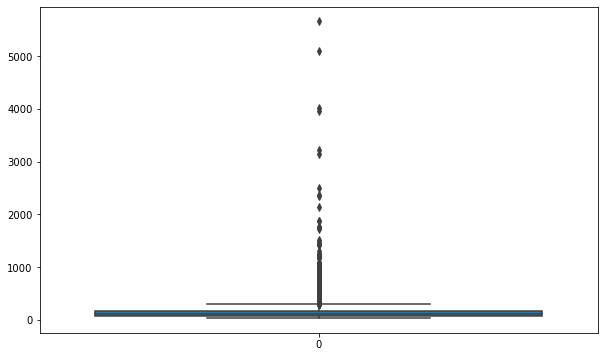

In [7]:
#plotting a boxplot to graphically display outliers 
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df["revenues_from_appointment"])

In [8]:
#the boxplot image above highlights how skewed our data is, so as a solution i will fill null values with the median
df["revenues_from_appointment"] = df["revenues_from_appointment"].fillna(df["revenues_from_appointment"].median())

#this would show that all columns now have the same number of non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   appointment_date           4061 non-null   datetime64[ns]
 1   clinic_name                4061 non-null   string        
 2   patient_id                 4061 non-null   string        
 3   practitioner_id            4061 non-null   string        
 4   appointment_duration_min   4061 non-null   int64         
 5   revenues_from_appointment  4061 non-null   float64       
 6   appointment_month          4061 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), string(3)
memory usage: 222.2 KB


In [9]:
#After concludind the cleaning process, the new data is saved and will now be forwarded to Excel to forecast revenue
df.to_csv('clinical_data_test.csv', index=False)